In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
             CRIM          RM       LSTAT
count  506.000000  506.000000  506.000000
mean     3.613524    6.284634   12.653063
std      8.601545    0.702617    7.141062
min      0.006320    3.561000    1.730000
25%      0.082045    5.885500    6.950000
50%      0.256510    6.208500   11.360000
75%      3.677083    6.623500   16.955000
max     8

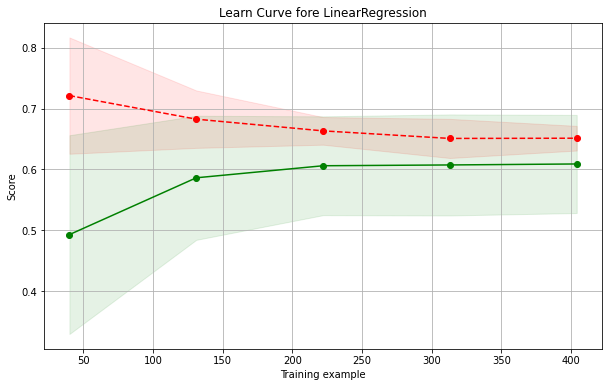

No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'C:\\Users\\董坤凌\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

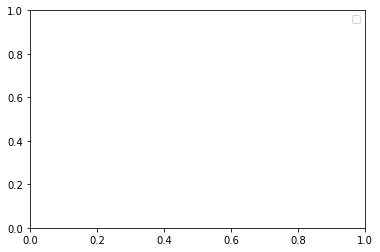

In [4]:
boston = load_boston()                      # 加载boston数据

X = boston.data                             # data为数据中的13个特征数据的所有值
Y = boston.target                           # target为数据中的想要预测的目标数据
# print(X.shape)                              # 训练向量，包括样本数量和特征的数量两个参数
#print(boston.keys())                        # boston的属性。输出结果dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

df = pd.DataFrame(boston.data,columns=boston.feature_names)        # 以feature_names作为列名，把data填充到矩阵中，得到boston的数据
df['target'] = pd.Series(boston.target)     # 把target内容以列的形式保存在df的target中
print(df.head())                            # 只读取df中前五行数据，默认为五行

features = df[['CRIM','RM','LSTAT']]        # 选取三个特征
print(features.describe())                  # 显示数量统计(count)，均值(mean)，标准差(std)，最小值(min)，四分位数(25%,50%,75%)，最大值(max)

target = df['target']                       # 取出target的数值

split_num = int(len(features)*0.7)          # 切割数据集，train占0.7，test占0.3

X_train = features[:split_num]              # X_train取前70%部分的数据
Y_train = target[:split_num]                # Y_train取前70%部分的数据


X_test = features[split_num:]               # X_test取后30%部分的数据
Y_test = target[split_num:]                 # Y_test取后30%部分的数据

model = LinearRegression()                  # 使用线性回归
model.fit(X_train,Y_train)                  # 构建模型，调用fit训练
print(model.coef_,model.intercept_)         # 打印系数θ1，θ2，θ3和截距θ0
                                            # 拟合直线f = θ1*x1+θ2*x2+θ3*x3+θ0
                                            # x1，x2，x3分别对应特征'CRIM','RM','LSTAT'
preds = model.predict(X_test)               # 用测试集测试得到预测结果
print(preds)                                # 输出预测值


def mae_value(y_true,y_pred):               # 计算MAE，传递参数分别为真实值和预测值
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred)) / n
    return mae

def mse_value(y_true,y_pred):               # 计算MSE
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred)) / n
    return mse

mae = mae_value(Y_test.values,preds)        # values返回列表中所有的值
mse = mse_value(Y_test.values,preds)
print("MAE:",mae)
print("MSE:",mse)

def plot_learning_curve(plt,estimator,title,X,Y,ylim = None,cv = None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):    # 封装学习曲线函数
                            #estimator为使用的分类器。
                            #X为传入的矩阵（feature）
                            #Y传入的特征属性（target）
                            #ylim定义y轴取值范围
                            #cv默认使用3折交叉验证
                            #n_jobs并行运行的作业数
                            #train_sizes训练样本的相对或绝对的数字
    plt.title(title)                                    # plt.title设置图像标题
    if ylim is not None:
        plt.ylime(*ylim)
    plt.xlabel("Training example")                      # 设置x和y轴的标题
    plt.ylabel("Score")                                 # 设置x和y轴的标题
    train_sizes,train_scores,test_scores = learning_curve(estimator, X, Y, cv = cv, n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)   # 平均值
    train_scores_std = np.std(train_scores, axis=1)     # 标准差
    test_scores_mean = np.mean(test_scores, axis=1)     # 平均值
    test_scores_std = np.std(test_scores, axis=1)       # 标准差
    plt.grid()                                          # 生成网格线
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")                         # 曲线下面覆盖成红色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")                         # 曲线下面覆盖成绿色
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r", label="Training score")          # 显示红色曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")    # 显示绿色曲线
    plt.show()                                          # 在pycharm里取消注释
    plt.legend(loc="best")                              # 图例位置放在合适(best)位置
    return plt

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)     # 交叉验证的参数
plt.figure(figsize=(10,6))                              # 指定figure的高和宽
plot_learning_curve(plt,model,"Learn Curve fore LinearRegression",features,target,ylim=None,cv=cv)
                                            